In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('Zomatodataset\zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Steps to follow
1. Deal with missing values
2. Explore about numerical features
3. Explore about categorical features
4. Find relationships between features
5. Deal with duplicates

## 1. Handelling missing values

In [13]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
# getting the list of all the features that have null values
featureWithNullValues = [x for x in df.columns if df[x].isnull().sum()>0]
print(featureWithNullValues)

['Cuisines']


In [17]:
df_country = pd.read_excel('Zomatodataset\Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [19]:
final_df = pd.merge(df, df_country, how = 'left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [22]:
# trying to find the countries in which zomato has the maximum sales
final_df['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [26]:
country_labels = final_df['Country'].value_counts().index
country_counts = final_df['Country'].value_counts().values
print(country_counts)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


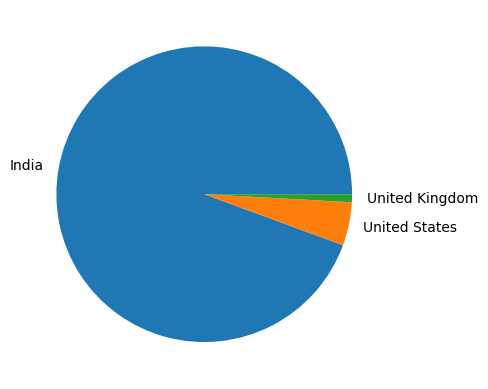

In [32]:
plt.pie(labels=country_labels[:3], x=country_counts[:3]);

In [33]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [41]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [42]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [52]:
# Finding the countries that have given 0 ratings
country_rating = final_df.groupby(['Aggregate rating','Country']).size().reset_index().rename(columns={0:'Rating Count'})

In [53]:
country_rating

,Aggregate rating,Country,Rating Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [56]:
zero_rating_countries = [{row['Country']: row['Rating Count']} for index, row in country_rating.iterrows() if row['Aggregate rating'] == 0]

In [57]:
zero_rating_countries

[{'Brazil': 5}, {'India': 2139}, {'United Kingdom': 1}, {'United States': 3}]

In [58]:
# find which currency is used by which country
currecy_country_map = final_df.groupby(['Country', 'Currency']).size().reset_index()

In [59]:
currecy_country_map

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [60]:
# Which countries have online delivery options
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [68]:
country_with_online = final_df[final_df['Has Online delivery'] == "Yes"].Country.value_counts()

In [69]:
country_with_online

Country
India    2423
UAE        28
Name: count, dtype: int64

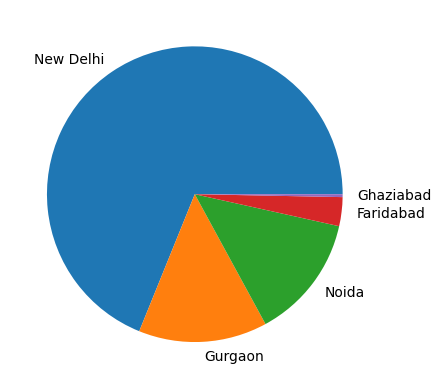

In [80]:
# create pie chart for cities ditribution
city = final_df.City.value_counts().index
city_cnt = final_df.City.value_counts().values

plt.pie(x = city_cnt[:5], labels=city[:5]);

In [131]:
# Find the top 10 cuisines
# the best matrix should be related to rating and number of time ordered
best_cousine = final_df.groupby(['Cuisines', 'Aggregate rating']).size().reset_index().rename(columns={0:'Rating Count'})

In [136]:
best_cousine

,Cuisines,Aggregate rating,Rating Count
0,Afghani,0.0,3
1,Afghani,2.9,1
2,"Afghani, Mughlai, Chinese",0.0,1
3,"Afghani, North Indian",0.0,1
4,"Afghani, North Indian, Pakistani, Arabian",0.0,1
...,...,...,...
3919,"Western, Asian, Cafe",4.2,1
3920,"Western, Fusion, Fast Food",3.2,1
3921,World Cuisine,4.9,1
3922,"World Cuisine, Mexican, Italian",4.4,1


In [135]:
total_purchase = best_cousine['Rating Count'].sum()
print(total_purchase)

9542


In [141]:
ciusine_leaderboard = best_cousine.groupby('Cuisines').agg({
    'Aggregate rating' : 'mean',
    'Rating Count' : 'sum'
}).reset_index()

In [142]:
ciusine_leaderboard['Purchase Percentage'] = ciusine_leaderboard['Rating Count']/total_purchase

In [92]:
def cuisine_metric(average_rating, purchase_percentage):
    return 0.7*average_rating + 0.3*purchase_percentage

In [143]:
ciusine_leaderboard['Final Rating'] = cuisine_metric(ciusine_leaderboard['Aggregate rating'], ciusine_leaderboard['Purchase Percentage'])


In [151]:
ciusine_leaderboard = ciusine_leaderboard.sort_values(by='Final Rating', ascending=False).reset_index()

In [153]:
ciusine_leaderboard.head(20)

,index,Cuisines,Aggregate rating,Rating Count,Purchase Percentage,Final Rating
0,1779,"Sunda, Indonesian",4.90,3,0.000314,3.430094
1,1062,"Italian, Deli",4.90,1,0.000105,3.430031
2,33,"American, Burger, Grill",4.90,1,0.000105,3.430031
3,37,"American, Caribbean, Seafood",4.90,1,0.000105,3.430031
4,41,"American, Coffee and Tea",4.90,1,0.000105,3.430031
5,683,"Continental, Indian",4.90,1,0.000105,3.430031
6,93,"American, Sandwich, Tea",4.90,1,0.000105,3.430031
7,796,"European, Asian, Indian",4.90,1,0.000105,3.430031
8,803,"European, Contemporary",4.90,1,0.000105,3.430031
9,808,"European, German",4.90,1,0.000105,3.430031
